In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [92]:
df=pd.read_csv('worldhappinessreport.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [93]:
df.shape

(158, 12)

In [94]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [95]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [96]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [97]:
count=df.isnull().sum()
count

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

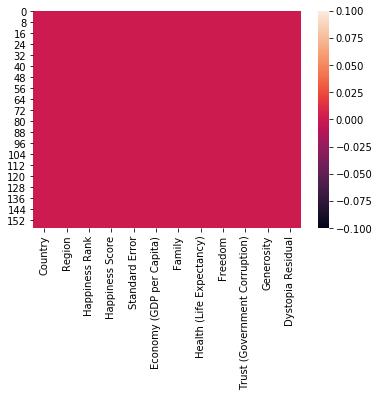

In [98]:
sns.heatmap(df.isnull())

In [99]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


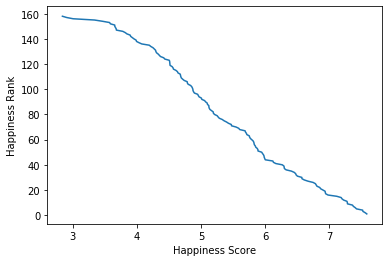

In [100]:
sns.lineplot(x='Happiness Score',y='Happiness Rank',data=df)
plt.show()

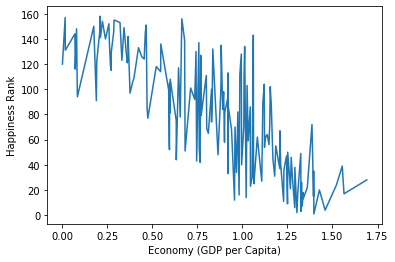

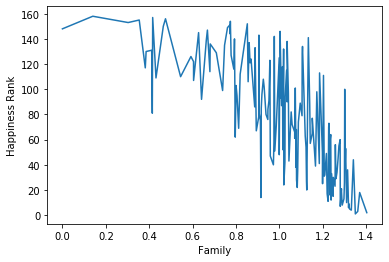

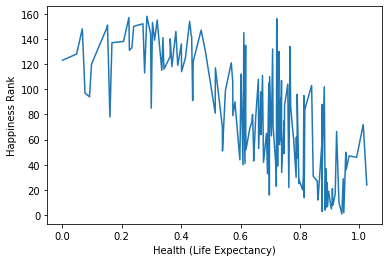

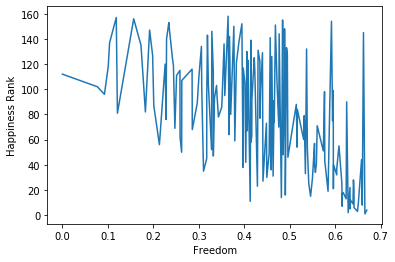

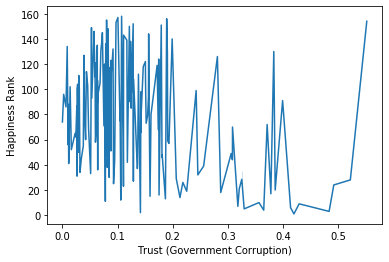

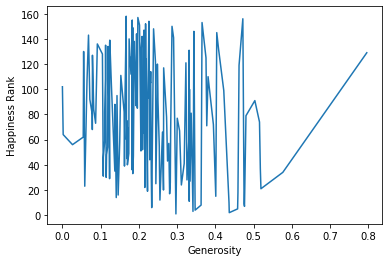

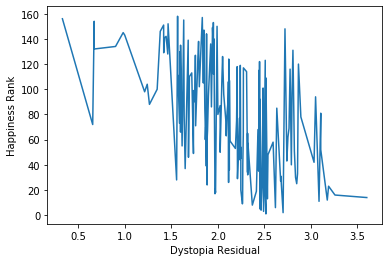

In [101]:
m=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
for i in m:
    sns.lineplot(x=i,y='Happiness Rank',data=df)
    plt.show()
    

In [102]:
dco=df.corr()
dco

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


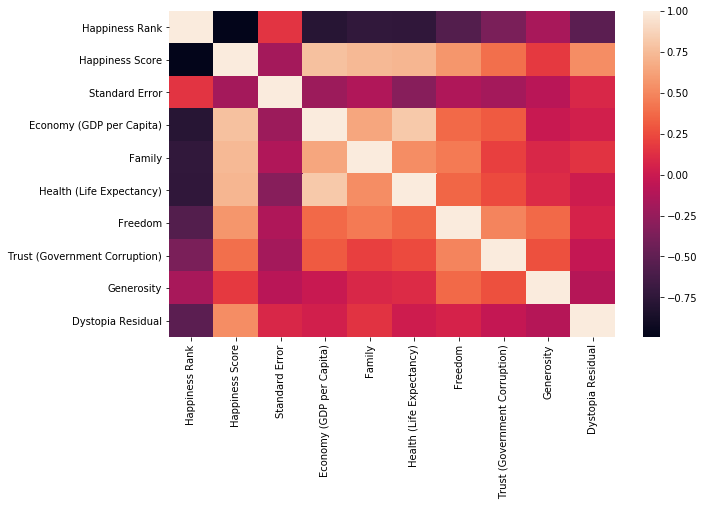

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(dco)

Happines score is positively related to economy,family,health,freedom,trust

Economy is postively related to family,health,freedom,trust

Similarly , these variables has somewhat a postive relationship amongst themselves

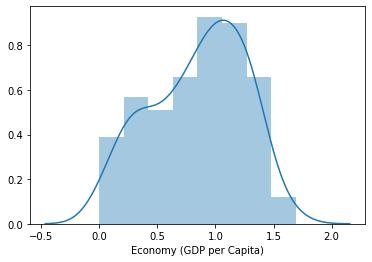

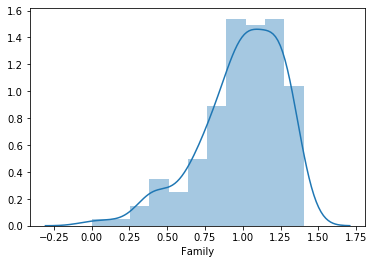

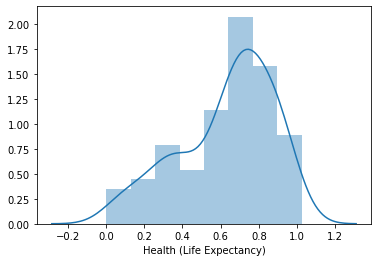

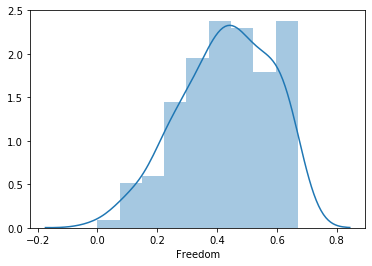

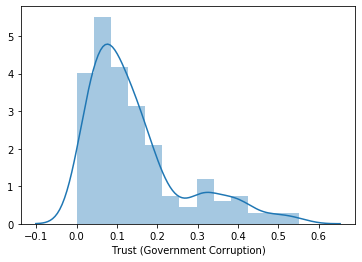

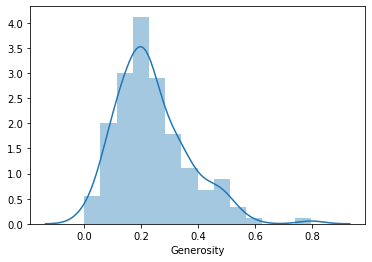

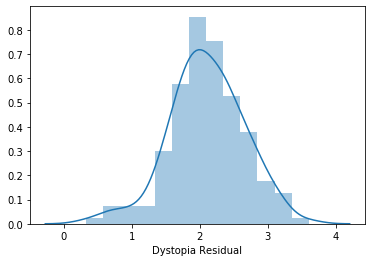

In [104]:
m=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
for i in m:
    sns.distplot(df[i])
    plt.show()
    

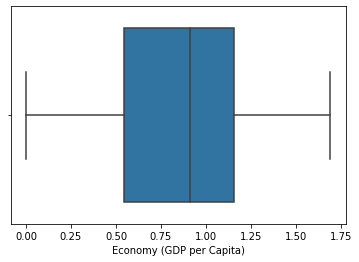

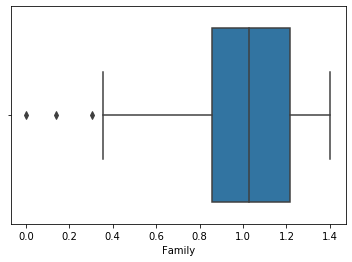

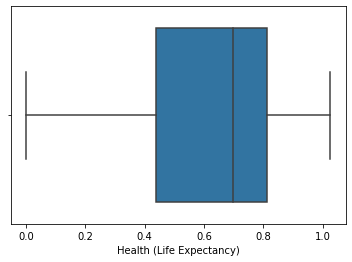

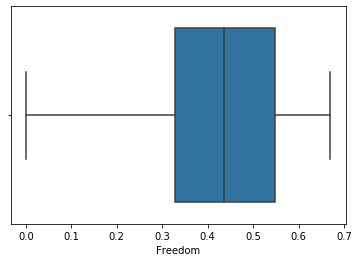

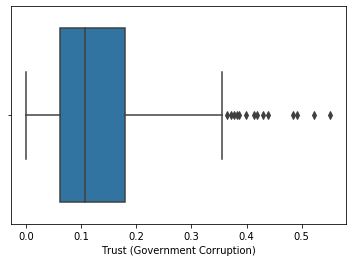

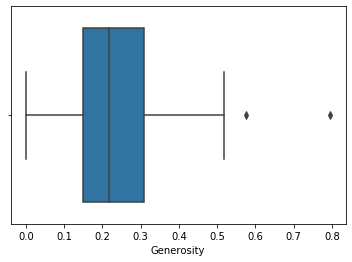

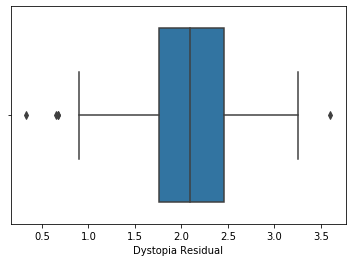

In [105]:
m=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
for i in m:
    sns.boxplot(df[i])
    plt.show()
    

 Some skewness is present in certain attributes which needs to be taken care of-family,health,trust,generosity

Certain outliers also need to be dealt with

In [106]:
dff=df.drop(columns=['Country','Region','Standard Error'])


In [107]:
from scipy.stats import zscore

In [108]:
z_score=abs(zscore(dff))
print(dff.shape)
dffinal=dff.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(158, 9)
(152, 9)


In [109]:
dffinal

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [110]:
dffinal.skew()

Happiness Rank                   0.008526
Happiness Score                  0.165587
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

In [111]:
dffinal.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [114]:
dffinal.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [115]:
for colu in dffinal.columns:
    if dffinal.skew().loc[colu]>0.55:
        dffinal[colu]=np.log1p(dffinal[colu]+1)

In [116]:
dffinal.skew()

Happiness Rank                   0.008526
Happiness Score                  0.165587
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.189401
Generosity                       0.521880
Dystopia Residual               -0.045578
dtype: float64

In [117]:
dffinal

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.883677,0.831508,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.761483,0.890480,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.909697,0.850745,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.860791,0.853134,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.845684,0.899393,2.45176
5,6,7.406,1.29025,1.31826,0.88911,0.64169,0.881169,0.803574,2.61955
6,7,7.378,1.32944,1.28017,0.89284,0.61576,0.840765,0.906685,2.46570
7,8,7.364,1.33171,1.28907,0.91087,0.65980,0.891358,0.859771,2.37119
8,9,7.286,1.25018,1.31967,0.90837,0.63938,0.887570,0.906244,2.26425
9,10,7.284,1.33358,1.30923,0.93156,0.65124,0.857122,0.890201,2.26646


In [118]:
dffinal.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [119]:
x=dffinal.drop(columns=['Happiness Rank','Happiness Score'])
y=dffinal['Happiness Score']

In [120]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.883677,0.831508,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.761483,0.890480,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.909697,0.850745,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.860791,0.853134,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.845684,0.899393,2.45176
5,1.29025,1.31826,0.88911,0.64169,0.881169,0.803574,2.61955
6,1.32944,1.28017,0.89284,0.61576,0.840765,0.906685,2.46570
7,1.33171,1.28907,0.91087,0.65980,0.891358,0.859771,2.37119
8,1.25018,1.31967,0.90837,0.63938,0.887570,0.906244,2.26425
9,1.33358,1.30923,0.93156,0.65124,0.857122,0.890201,2.26646


In [121]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
5      7.406
6      7.378
7      7.364
8      7.286
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
19     6.901
20     6.867
21     6.853
22     6.810
23     6.798
24     6.786
25     6.750
26     6.670
28     6.575
29     6.574
30     6.505
31     6.485
32     6.477
33     6.455
34     6.411
35     6.329
36     6.302
37     6.298
38     6.295
39     6.269
40     6.168
41     6.130
42     6.123
43     6.003
44     5.995
45     5.987
46     5.984
47     5.975
48     5.960
49     5.948
50     5.890
51     5.889
52     5.878
53     5.855
54     5.848
55     5.833
56     5.828
57     5.824
58     5.813
59     5.791
60     5.770
61     5.759
62     5.754
63     5.716
64     5.709
65     5.695
66     5.689
67     5.605
68     5.589
69     5.548
70     5.477
71     5.474
72     5.429
73     5.399
74     5.360
75     5.332
76     5.286
77     5.268

In [122]:
x.isnull().sum()

Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.38120592,  1.36173566,  1.24883532, ...,  2.44014319,
         0.57248746,  0.7472976 ],
       [ 1.13920813,  1.57273597,  1.27511639, ...,  0.05514006,
         1.69850901,  1.10115487],
       [ 1.19871199,  1.40604092,  0.97499558, ...,  2.94801628,
         0.93979276,  0.69873159],
       ...,
       [-1.38508144, -2.82729288, -1.36729975, ..., -0.35249512,
         1.1321756 , -0.33610398],
       [-1.47030351, -2.62313647, -1.30272457, ..., -0.51220098,
        -0.40114368, -0.94714645],
       [-2.16746989, -2.37495496, -1.69279963, ..., -0.32059866,
        -0.27323537, -0.56432974]])

In [125]:
xd=pd.DataFrame(x)
xd

,0,1,2,3,4,5,6
0,1.381206,1.361736,1.248835,1.586462,2.440143,0.572487,0.747298
1,1.139208,1.572736,1.275116,1.340836,0.055140,1.698509,1.101155
2,1.198712,1.406041,0.974996,1.478400,2.948016,0.939793,0.698732
3,1.541758,1.287453,1.018333,1.614229,1.993450,0.985406,0.647502
4,1.200793,1.254074,1.102055,1.368870,1.698588,1.868680,0.621532
5,1.108197,1.236664,1.034323,1.427072,2.391201,0.039118,0.943114
6,1.208886,1.084217,1.049616,1.253999,1.602586,2.007914,0.648249
7,1.214718,1.119838,1.123539,1.547950,2.590080,1.112143,0.467113
8,1.005247,1.242308,1.113289,1.411654,2.516139,1.999507,0.262155
9,1.219523,1.200524,1.208368,1.490815,1.921849,1.693179,0.266391


In [126]:
xd.skew()

0   -0.401110
1   -0.815356
2   -0.733453
3   -0.406211
4    1.189401
5    0.521880
6   -0.045578
dtype: float64

In [127]:
xd.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [128]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=42)

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.externals import joblib


In [130]:
def maxr2_score(regr,xd,y):
    max_r_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        r2_scr=r2_score(ytest,ypred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score= r2_scr
            finalrstate=r_state
    print('max r2 score corresponding to',finalrstate,'is',max_r_score)
    return finalrstate

In [131]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,xd,y)

r2 score corresponding to  42 is 0.999982148926186
r2 score corresponding to  43 is 0.9999782923920678
r2 score corresponding to  44 is 0.999979660816733
r2 score corresponding to  45 is 0.9999821747776804
r2 score corresponding to  46 is 0.9999798260110723
r2 score corresponding to  47 is 0.9999822170959962
r2 score corresponding to  48 is 0.9999882788605827
r2 score corresponding to  49 is 0.9999806419146251
r2 score corresponding to  50 is 0.9999603442925666
r2 score corresponding to  51 is 0.9999786018898571
r2 score corresponding to  52 is 0.9999735888116967
r2 score corresponding to  53 is 0.9999879615597826
r2 score corresponding to  54 is 0.9999901221613433
r2 score corresponding to  55 is 0.9999700577225172
r2 score corresponding to  56 is 0.9999848832040158
r2 score corresponding to  57 is 0.9999737542602904
r2 score corresponding to  58 is 0.9999675774731213
r2 score corresponding to  59 is 0.9999682634911615
r2 score corresponding to  60 is 0.9999801311610793
r2 score corre

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(xd,y)
gknr.best_params_

{'n_neighbors': 9}

In [133]:
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,xd,y)

r2 score corresponding to  42 is 0.9306394814087323
r2 score corresponding to  43 is 0.9195410055381419
r2 score corresponding to  44 is 0.9127792666407551
r2 score corresponding to  45 is 0.9326475592914568
r2 score corresponding to  46 is 0.9105283459164136
r2 score corresponding to  47 is 0.9027901051763998
r2 score corresponding to  48 is 0.9216084960653934
r2 score corresponding to  49 is 0.9126718805955014
r2 score corresponding to  50 is 0.9202987708417542
r2 score corresponding to  51 is 0.9244771834376491
r2 score corresponding to  52 is 0.9474629989913079
r2 score corresponding to  53 is 0.9235377908895573
r2 score corresponding to  54 is 0.8996973161514501
r2 score corresponding to  55 is 0.8954959562077315
r2 score corresponding to  56 is 0.9360884908975963
r2 score corresponding to  57 is 0.9341769006690664
r2 score corresponding to  58 is 0.877467183458215
r2 score corresponding to  59 is 0.9052642666427466
r2 score corresponding to  60 is 0.9067318049766687
r2 score corr

In [134]:
print('mean r2 score for LR',cross_val_score(lreg,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for LR is',cross_val_score(lreg,xd,y,cv=10,scoring='r2').std())

mean r2 score for LR 0.9968888905050977
Std dev. in r2 score for LR is 0.002812278670861972


In [135]:
print('mean r2 score for KNN',cross_val_score(knr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for KNR is',cross_val_score(knr,xd,y,cv=10,scoring='r2').std())

mean r2 score for KNN -10.100992883648246
Std dev. in r2 score for KNR is 5.192650162718266


In [136]:
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
list=[Lasso(),Ridge(),ElasticNet()]
for i in list:
    grid=GridSearchCV(estimator=i,param_grid=alphavalue)
    grid.fit(xd,y)
    print(grid.best_score_)
    print(grid.best_estimator_.alpha)
    print(grid.best_params_)
    print('\n')

0.9994437636892346
0
{'alpha': 0}


0.9994429051743466
0
{'alpha': 0}


0.9994437636892346
0
{'alpha': 0}




In [137]:
la=Lasso(alpha=0)
r_state=maxr2_score(la,xd,y)

r2 score corresponding to  42 is 0.9999821248035312
r2 score corresponding to  43 is 0.9999784376991669
r2 score corresponding to  44 is 0.9999798670435865
r2 score corresponding to  45 is 0.9999819841315332
r2 score corresponding to  46 is 0.9999799514126958
r2 score corresponding to  47 is 0.999982081974194
r2 score corresponding to  48 is 0.999988283768601
r2 score corresponding to  49 is 0.9999804948177307
r2 score corresponding to  50 is 0.9999602702262785
r2 score corresponding to  51 is 0.9999784602515466
r2 score corresponding to  52 is 0.9999737387742464
r2 score corresponding to  53 is 0.9999879584711825
r2 score corresponding to  54 is 0.9999901306601743
r2 score corresponding to  55 is 0.9999699100728441
r2 score corresponding to  56 is 0.9999849760242387
r2 score corresponding to  57 is 0.9999738669905502
r2 score corresponding to  58 is 0.9999675163836799
r2 score corresponding to  59 is 0.9999679805460567
r2 score corresponding to  60 is 0.9999800007254787
r2 score corre

In [138]:
print('mean r2 score for LA',cross_val_score(la,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for LA is',cross_val_score(la,xd,y,cv=10,scoring='r2').std())

mean r2 score for LA 0.9968880977985075
Std dev. in r2 score for LA is 0.0028154998756572064


In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [140]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
print('mean r2 score for GBR is',cross_val_score(gbr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for GBR is',cross_val_score(gbr,xd,y,cv=10,scoring='r2').std())

mean r2 score for GBR is -6.913670334819026
Std dev. in r2 score for GBR is 5.208807213649627


In [141]:
svr=SVR()
parameters={'kernel':['linear','poly','rbf'],'C':[1,10]}
clf=GridSearchCV(svr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_


{'C': 1, 'kernel': 'linear'}

In [143]:
svr=SVR(kernel='linear',C=1)
r_state=maxr2_score(svr,xd,y)

r2 score corresponding to  42 is 0.9976411928901896
r2 score corresponding to  43 is 0.9973272004793172
r2 score corresponding to  44 is 0.9972416467921557
r2 score corresponding to  45 is 0.9976192208398496
r2 score corresponding to  46 is 0.9974704261385684
r2 score corresponding to  47 is 0.9968087755910481
r2 score corresponding to  48 is 0.9970105943135867
r2 score corresponding to  49 is 0.9970766321804823
r2 score corresponding to  50 is 0.9978112559065109
r2 score corresponding to  51 is 0.9975252054180389
r2 score corresponding to  52 is 0.9978297414415651
r2 score corresponding to  53 is 0.997708414942718
r2 score corresponding to  54 is 0.9978846650315141
r2 score corresponding to  55 is 0.9975515129325779
r2 score corresponding to  56 is 0.997299448695465
r2 score corresponding to  57 is 0.997388112658692
r2 score corresponding to  58 is 0.9967407096788534
r2 score corresponding to  59 is 0.9978010277448933
r2 score corresponding to  60 is 0.997002523512372
r2 score corresp

In [144]:
svr=SVR(kernel='linear',C=1)
print('mean r2 score for SVR is',cross_val_score(svr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for SVR is',cross_val_score(svr,xd,y,cv=10,scoring='r2').std())

mean r2 score for SVR is 0.777068841381251
Std dev. in r2 score for SVR is 0.15413827975087052


In [145]:
rfr=RandomForestRegressor()
parameters={'n_estimators':[10,500]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'n_estimators': 500}

In [146]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,xd,y)

r2 score corresponding to  42 is 0.9325887342124265
r2 score corresponding to  43 is 0.9179620176992853
r2 score corresponding to  44 is 0.9339719714941743
r2 score corresponding to  45 is 0.925486707018491
r2 score corresponding to  46 is 0.9021168231289475
r2 score corresponding to  47 is 0.8974698021743468
r2 score corresponding to  48 is 0.9445225530727293
r2 score corresponding to  49 is 0.9017582515216682
r2 score corresponding to  50 is 0.9120676133945796
r2 score corresponding to  51 is 0.9016893270574375
r2 score corresponding to  52 is 0.8990270244367534
r2 score corresponding to  53 is 0.9355479771559219
r2 score corresponding to  54 is 0.9002069579801707
r2 score corresponding to  55 is 0.8693156782715522
r2 score corresponding to  56 is 0.9491531027830235
r2 score corresponding to  57 is 0.9187715489019153
r2 score corresponding to  58 is 0.8898102534534504
r2 score corresponding to  59 is 0.8904828708281192
r2 score corresponding to  60 is 0.8753627293465936
r2 score corr

In [147]:
rfr=RandomForestRegressor(n_estimators=500)
print('mean r2 score for SVR is',cross_val_score(rfr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for SVR is',cross_val_score(rfr,xd,y,cv=10,scoring='r2').std())

mean r2 score for SVR is -8.950897716451873
Std dev. in r2 score for SVR is 5.429084266613759


In [154]:
adareg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[100,500],'base_estimator':[lreg,la]}
clf=GridSearchCV(adareg,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.01,
 'n_estimators': 100}

In [155]:
adareg=AdaBoostRegressor(learning_rate=0.01,n_estimators=100,base_estimator=lreg)
r_state=maxr2_score(adareg,xd,y)

r2 score corresponding to  42 is 0.9999821874067002
r2 score corresponding to  43 is 0.9999784050088126
r2 score corresponding to  44 is 0.9999799130083019
r2 score corresponding to  45 is 0.9999822590726002
r2 score corresponding to  46 is 0.9999799734655107
r2 score corresponding to  47 is 0.999982157489085
r2 score corresponding to  48 is 0.9999882979422178
r2 score corresponding to  49 is 0.9999793280780913
r2 score corresponding to  50 is 0.9999610846887228
r2 score corresponding to  51 is 0.999977494567948
r2 score corresponding to  52 is 0.9999739097127623
r2 score corresponding to  53 is 0.9999876867858095
r2 score corresponding to  54 is 0.9999895391336758
r2 score corresponding to  55 is 0.9999694055725332
r2 score corresponding to  56 is 0.9999844130741565
r2 score corresponding to  57 is 0.999973892037953
r2 score corresponding to  58 is 0.9999672620488596
r2 score corresponding to  59 is 0.9999675356435893
r2 score corresponding to  60 is 0.9999799285951585
r2 score corres

In [156]:
adareg=AdaBoostRegressor(learning_rate=0.01,n_estimators=100,base_estimator=lreg)
print('mean r2 score for ABR is',cross_val_score(adareg,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for ABR is',cross_val_score(adareg,xd,y,cv=10,scoring='r2').std())

mean r2 score for ABR is 0.9969115650081639
Std dev. in r2 score for ABR is 0.0027908222270271793


# AdaBoostRegression gives out the best result of the tried models
random state corresponding to highest r2score is 54

In [158]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=54)
adareg=AdaBoostRegressor(learning_rate=0.01,n_estimators=100,base_estimator=lreg)
adareg.fit(xtrain,ytrain)
ypred=adareg.predict(xtest)

In [159]:
print('RMSE is',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score is',r2_score(ytest,ypred))

RMSE is 0.0037212223139250346
r2_score is 0.9999891512401846


In [160]:
from sklearn.externals import joblib
joblib.dump(adareg,'adaregfile.obj')
adareg_from_joblib=joblib.load('adaregfile.obj')
adareg_from_joblib.predict(xtest)

array([7.58465364, 5.99009226, 4.9606936 , 3.89386235, 5.21120469,
       5.47551965, 6.00418572, 5.20028655, 4.51854294, 7.42515354,
       6.12939049, 3.78318937, 3.59057034, 4.84369392, 4.61177366,
       5.01173904, 4.51654659, 4.95285319, 6.41383613, 7.2296312 ,
       3.65909201, 4.55804476, 4.37032612, 3.68512621, 3.57764531,
       4.50669438, 5.10265473, 6.33300258, 4.87640854, 5.20039949,
       7.28426736, 4.03299574, 5.99727205, 5.8812306 ])